In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS
Date,,,,,
2015-01-01,294.023926,294.983685,292.271302,294.357742,2583280
2015-01-02,302.369720,303.371224,293.773497,293.773497,8272990
2015-01-05,302.995544,306.625996,301.701942,304.873373,10316090
2015-01-06,290.143036,300.366705,288.932895,299.949400,13282427
2015-01-07,282.297913,288.974589,279.961091,288.432107,21254332


In [12]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2695 entries, 2015-01-01 to 2025-11-28
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, ICICIBANK.NS)   2695 non-null   float64
 1   (High, ICICIBANK.NS)    2695 non-null   float64
 2   (Low, ICICIBANK.NS)     2695 non-null   float64
 3   (Open, ICICIBANK.NS)    2695 non-null   float64
 4   (Volume, ICICIBANK.NS)  2695 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 126.3 KB


In [13]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2148, 7)
(537, 7)
(2148,)
(537,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1[0]

938.9517280705905

In [16]:
print(y_test)

Date
2023-09-26     927.890625
2023-09-27     927.398743
2023-09-28     936.548767
2023-09-29     925.135803
2023-10-03     915.051086
                 ...     
2025-11-21    1368.400024
2025-11-24    1357.800049
2025-11-25    1375.000000
2025-11-26    1392.199951
2025-11-27    1388.800049
Name: Target, Length: 537, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  305.825107110787
Root Mean Squared Error:  17.487855989537053
R2 Score:  0.9887538233137615


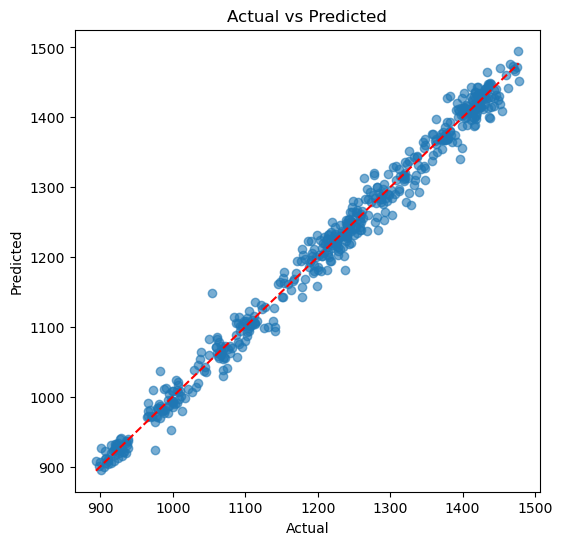

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
import joblib 
joblib.dump(lr, "ICICIBANK.NS.pkl")
model = joblib.load("ICICIBANK.NS.pkl")